# Lending Club Case Study

The basis idea for the analysis is to understand the driving factor leading to loan default.

The analysis is divided into four main parts:

1. Data understanding
2. Data cleaning (cleaning missing values, removing columns which are not used for analysis etc.)
3. Data Analysis
4. Recommendations

In [268]:
#Load the necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [269]:
#Load the dataset
df1 = pd.read_csv('loan.csv', dtype='unicode')

In [270]:
#read the dataset and check the first five rows
df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN


In [271]:
#Check the shape of the dataframe
df1.shape

(39717, 111)

So we have total 111 columns and total no of records as 39717. Let's start cleaning the data first.

# Data Cleaning

In [272]:
#Check the number of null values in the columns
df1.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [273]:
#Dropping all the columns which are Null for all the rows
df1= df1.dropna(axis=1, how='all')

In [274]:
#Checking again the shape of dataframe
df1.shape

(39717, 57)

In [275]:
#Again checking the null values
df1.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

Let's drop columns 'mths_since_last_record' & 'next_pymnt_d' with most of the values as Null.

Moreover "mths_since_last_record" & "next_pymnt_d" won't help in analysis of default much

In [276]:
#dropping the two columns
df1=df1.drop(['mths_since_last_record','next_pymnt_d'],axis=1)

In [277]:
#Again checking the null values
df1.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

Let's check few records for both "mths_since_last_delinq" and "desc"

In [278]:
df1[['mths_since_last_delinq','desc']]

,mths_since_last_delinq,desc
0,NaN,Borrower added on 12/22/11 > I need to upgra...
1,NaN,Borrower added on 12/22/11 > I plan to use t...
2,NaN,NaN
3,35,Borrower added on 12/21/11 > to pay for prop...
4,38,Borrower added on 12/21/11 > I plan on combi...
...,...,...
39712,0,Our current gutter system on our home is old a...
39713,5,The rate of interest and fees incurred by carr...
39714,0,NaN
39715,0,NaN


In [279]:
#We can drop these two columns since description is not of much use in analysis for finding analysis for default loan
#Also months since last delinq will not be able to help the analysis for new loans
df1=df1.drop(['mths_since_last_delinq','desc'],axis=1)

In [280]:
#Again checking the null values
df1.isnull().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2459
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec             

Now Employment length and Employee title are 2 columns with maximum null values. Employement Month might be useful in anayzing the default rate of loan.Let's analyze Employee title column and see if it will be helpful in analysis

In [281]:
print(df1.emp_title.value_counts().sum())
print(df1.shape)

37258
(39717, 53)


In [282]:
#Looks like Employee title is mostly unique so it won't be helpful in analysing the pattern of loan default so drop this column
df1=df1.drop('emp_title', axis=1)

In [284]:
#Again checking the null values
df1.isnull().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal           

In [285]:
#checking the shape of dataframe
df1.shape

(39717, 52)

In [286]:
#Out of total 39717 data 1075 rows have Employment length as null. 
#If we can drop these rows then also we will have enough data to analyze, so let's drop these columns
df1=df1[~df1.emp_length.isnull()]

In [287]:
#Again checking the null values
df1.isnull().sum()

id                              0
member_id                       0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
emp_length                      0
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
loan_status                     0
pymnt_plan                      0
url                             0
purpose                         0
title                          10
zip_code                        0
addr_state                      0
dti                             0
delinq_2yrs                     0
earliest_cr_line                0
inq_last_6mths                  0
open_acc                        0
pub_rec                         0
revol_bal                       0
revol_util    

In [288]:
#checking the no of rows and columns once again
df1.shape

(38642, 52)

Looks like most of the Null data is cleaned up. Now let's start analyzing data and change data types,
modify data according to our analysis need.

# Data Analysis

In [289]:
#checking the unique values in all the columns
df2= df1.nunique()
df2

id                            38642
member_id                     38642
loan_amnt                       880
funded_amnt                    1038
funded_amnt_inv                8097
term                              2
int_rate                        371
installment                   15149
grade                             7
sub_grade                        35
emp_length                       11
home_ownership                    5
annual_inc                     5100
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           38642
purpose                          14
title                         19148
zip_code                        822
addr_state                       50
dti                            2863
delinq_2yrs                      11
earliest_cr_line                515
inq_last_6mths                    9
open_acc                         40
pub_rec                     

In [290]:
#since the columns with single unique value will not help in predicting the defaulters hence removing these columns
df1=df1.drop(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq', 'chargeoff_within_12_mths','delinq_amnt','tax_liens'], axis = 1)

The objective of our analysis is to predict the defaulters when applying for loan. As per data set there are variables which are related to customer loan behavior while paying the loan. Those won't be available during the application of new loan so let's remove those also. We have defined those columns with 'customer_loan_behavior'.

In [291]:
customer_loan_behavior=["delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d"]

In [292]:
#removing customer loan behavior variables
df1 = df1.drop(customer_loan_behavior, axis=1)

In [293]:
#let's start by analyzing the datatypes of all the columns
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    38642 non-null  object
 1   member_id             38642 non-null  object
 2   loan_amnt             38642 non-null  object
 3   funded_amnt           38642 non-null  object
 4   funded_amnt_inv       38642 non-null  object
 5   term                  38642 non-null  object
 6   int_rate              38642 non-null  object
 7   installment           38642 non-null  object
 8   grade                 38642 non-null  object
 9   sub_grade             38642 non-null  object
 10  emp_length            38642 non-null  object
 11  home_ownership        38642 non-null  object
 12  annual_inc            38642 non-null  object
 13  verification_status   38642 non-null  object
 14  issue_d               38642 non-null  object
 15  loan_status           38642 non-null

As we can see all the columns are of dtype object let's convert some of them into float/int depending on their logical names so that further analysis can be performed.
Such columns could be loan amount, int rates, installments, annual income

In [294]:
#converting data types
df1.int_rate = df1['int_rate'].apply(lambda x: float(x.split('%')[0]))
df1.loan_amnt = df1['loan_amnt'].apply(lambda x: float(x))
df1.installment = df1['installment'].apply(lambda x: float(x))
df1.annual_inc = df1['annual_inc'].apply(lambda x: float(x))
df1.member_id = df1['member_id'].apply(lambda x: int(x))

In [295]:
#checking the data type again
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38642 non-null  object 
 1   member_id             38642 non-null  int64  
 2   loan_amnt             38642 non-null  float64
 3   funded_amnt           38642 non-null  object 
 4   funded_amnt_inv       38642 non-null  object 
 5   term                  38642 non-null  object 
 6   int_rate              38642 non-null  float64
 7   installment           38642 non-null  float64
 8   grade                 38642 non-null  object 
 9   sub_grade             38642 non-null  object 
 10  emp_length            38642 non-null  object 
 11  home_ownership        38642 non-null  object 
 12  annual_inc            38642 non-null  float64
 13  verification_status   38642 non-null  object 
 14  issue_d               38642 non-null  object 
 15  loan_status        

In [296]:
#Also loan status current is the tenure of the loan is not yet completed.
#These candidates are not labelled as 'defaulted', so let's remove them also
df1=df1[df1.loan_status != 'Current']

In [297]:
#loan status is our target variable hence let's change it into numeric type and defining it into 0 and 1
df1['loan_status'] = df1['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

#converting loan_status to integer type
df1['loan_status'] = df1['loan_status'].apply(lambda x: pd.to_numeric(x))

In [298]:
# Getting the numeric value of term and changing the datatype of the column
df1['term']=df1['term'].apply(lambda x: str(x.split(' ')[1]))
df1['term'] = df1['term'].astype('int64')

In [299]:
#let's clear the employment lenth column and convert its data type
df1['emp_length']=df1['emp_length'].apply(lambda x: str(x.split('y')[0]))

In [300]:
#describing the emp_length after clearing the values
df1['emp_length'].describe()

count     37544
unique       11
top        10+ 
freq       8488
Name: emp_length, dtype: object

In [301]:
#Let's manipulate employment lenth such that it is helpful for our analysis
df1.loc[df1['emp_length'].str.contains('< 1'), 'emp_length'] = '0.5'
df1.loc[df1['emp_length'].str.contains('10+'), 'emp_length'] = '11'

In [302]:
#Year and month can be helpful in analyzing trends which months loan ar more defaulted
#or how it is effecting the defaults
#extract year, month from issue date
from datetime import datetime
df1['issue_d'] = df1['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [303]:
# extracting month and year from issue_date
df1['month'] = df1['issue_d'].apply(lambda x: x.month)
df1['year'] = df1['issue_d'].apply(lambda x: x.year)

Looks like most of the columns needed are modified and new columns needed are extracted from existing columns
Hence let's move to Univariate Analysis.

# Univariate Analysis

In [304]:
#Let's group the loan and see how many loans are defaulted in given data
#Member ID is a unique column so let's see how many members are in default and fully paid status
df1.groupby('loan_status')['member_id'].count()

loan_status
0    32145
1     5399
Name: member_id, dtype: int64

In [306]:
#let's find the percentage of default loans
loan_status_total=df1.groupby('loan_status')['member_id'].count().apply(lambda x: 100*x/len(df1.index))
print(loan_status_total)

loan_status
0    85.61954
1    14.38046
Name: member_id, dtype: float64


So out of total records around 14% of loans were defaulted and 85% were paid off. 

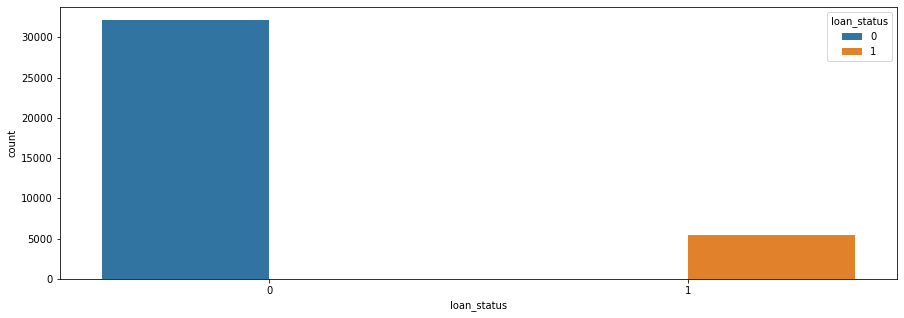

In [307]:
#plotting a count plot for the same
plt.figure(figsize=(15, 5))
sns.countplot(x='loan_status',hue='loan_status',data=df1)
plt.show()

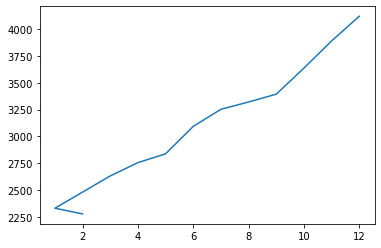

In [308]:
#plotting month and we can see increase in loan applications in later months
df1['month'].value_counts().plot()
plt.show()

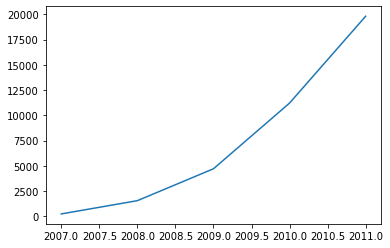

In [309]:
#plotting year and we can see increase in loan applications in later years
df1['year'].value_counts().plot()
plt.show()

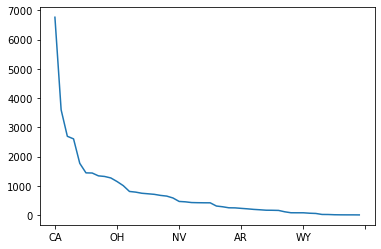

In [310]:
#plotting address state
#looks like CA has most no of applications
df1['addr_state'].value_counts().plot()
plt.show()

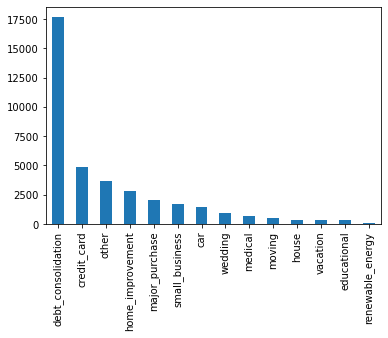

In [311]:
#most people in US opted loan for debt consolidation
df1['purpose'].value_counts().plot.bar()
plt.show()

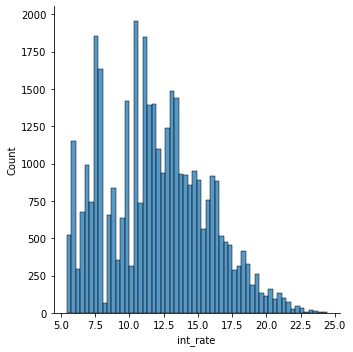

In [312]:
#Create a distribution plot for interest rates
#we see huge number of the loan applications were approved(paid full or defaulted) for Int rates around 7.5 & 10
sns.displot(df1.int_rate)
plt.show()

# Bivariate Analysis

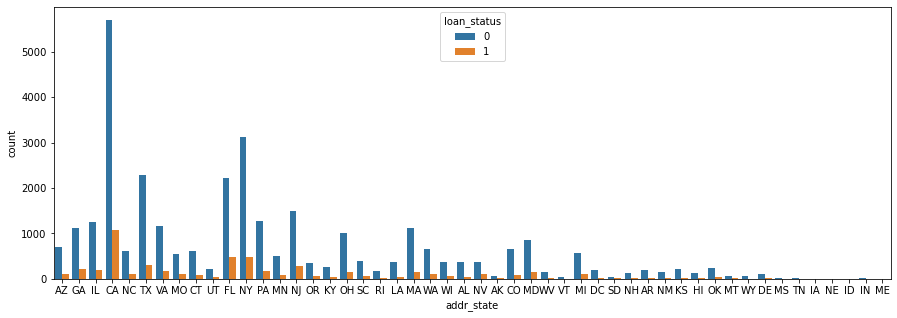

In [313]:
#plotting a count plot for the same
plt.figure(figsize=(15, 5))
sns.countplot(x='addr_state',hue='loan_status',data=df1)
plt.show()

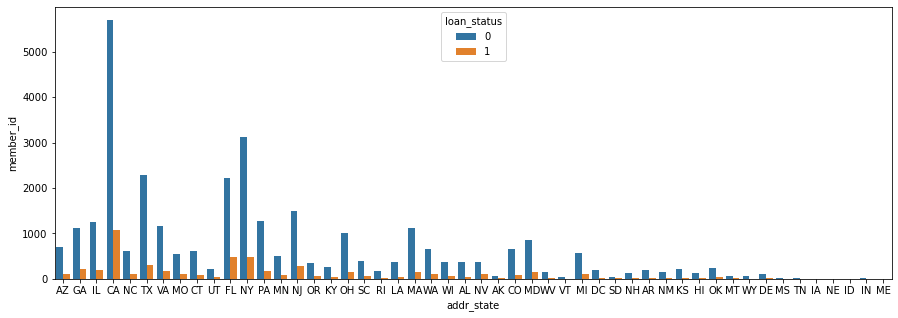

In [314]:
#State wise distribution of loan status for bar plot
plot_order = df1.groupby('addr_state')['loan_status'].sum().sort_values().index.values
plt.figure(figsize=(15, 5))
sns.barplot(data=df1,x='addr_state', y='member_id',estimator=len, hue='loan_status')
plt.show()

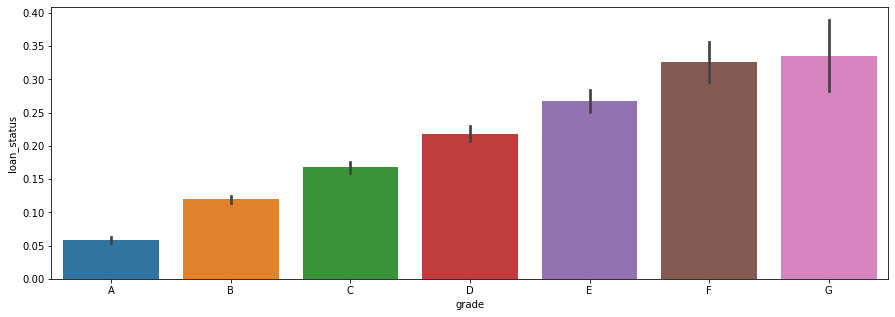

In [315]:
#plotting grade vs Loan Status with mean values
#looks like default status is lowest in Grade A and highest in Grade G
plot_order = df1.groupby('grade')['loan_status'].mean().sort_values().index.values
plt.figure(figsize=(15, 5))
sns.barplot(data=df1,x='grade', y='loan_status',order=plot_order)
plt.show()

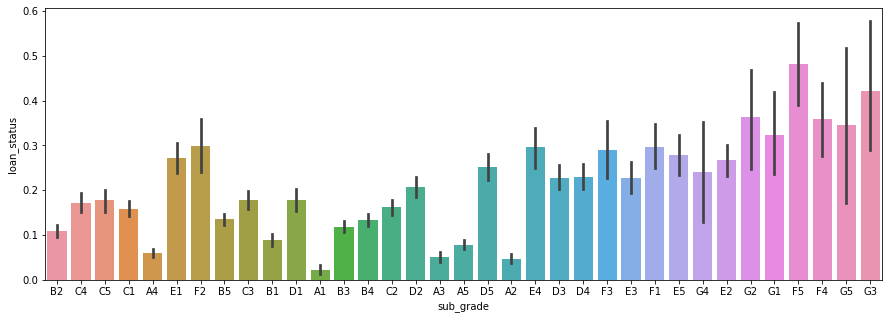

In [316]:
#plotting the bar plot for loan v/s sub grade
plt.figure(figsize=(15, 5))
sns.barplot(data=df1,x='sub_grade', y='loan_status')
plt.show()

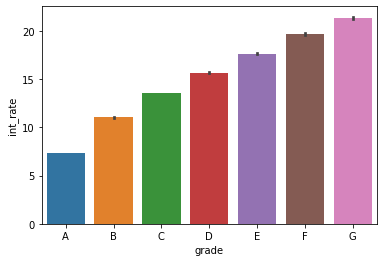

In [317]:
#plotting mean of interest rate v/s grades
#interest rates are higher in later grades
plot_order = df1.groupby('grade')['int_rate'].mean().sort_values().index.values
sns.barplot(data=df1,x='grade', y='int_rate',order=plot_order)
plt.show()

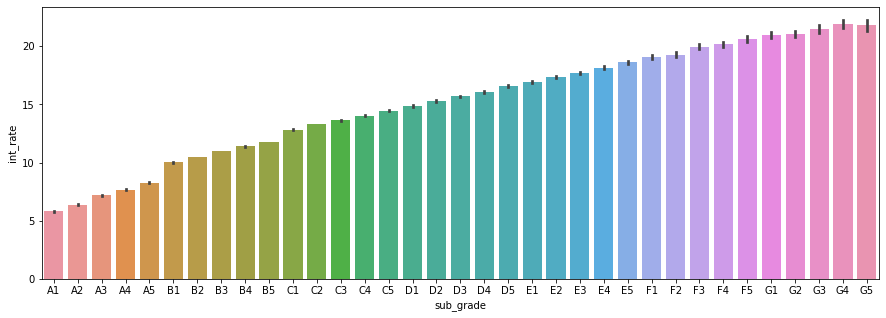

In [318]:
#plotting mean of interest rate v/s sub grades
plot_order = df1.groupby('sub_grade')['int_rate'].median().sort_values().index.values
plt.figure(figsize=(15, 5))
sns.barplot(data=df1,x='sub_grade', y='int_rate',order=plot_order)
plt.show()

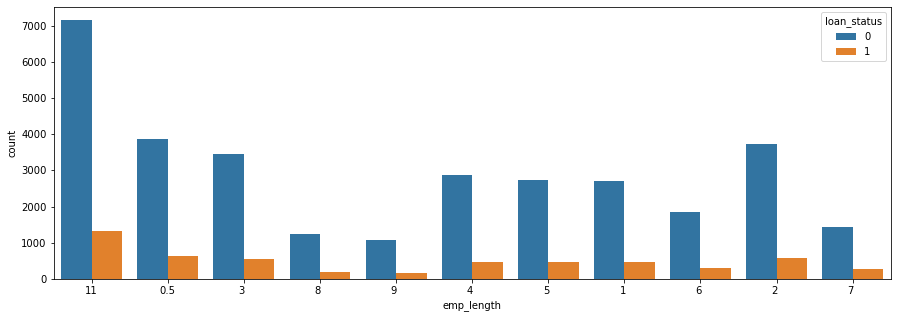

In [319]:
#plotting loan status v/s employment legth
plt.figure(figsize=(15, 5))
sns.countplot(x='emp_length',hue='loan_status',data=df1)
plt.show()

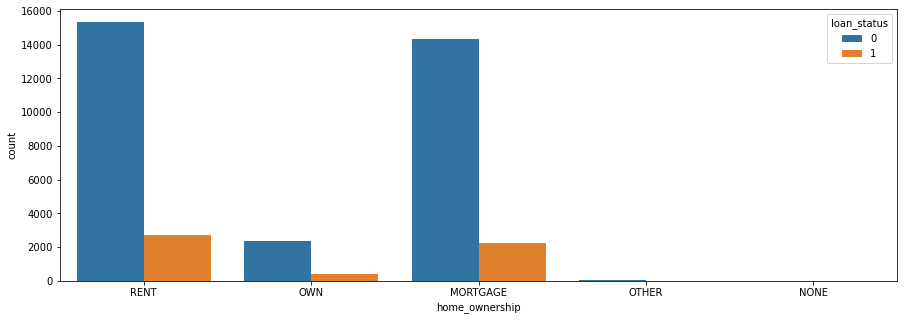

In [320]:
#plotting loan status vs home ownership
#we can see most of the defaults are from people who have Rent and Mortgage
plt.figure(figsize=(15, 5))
sns.countplot(x='home_ownership',hue='loan_status',data=df1)
plt.show()

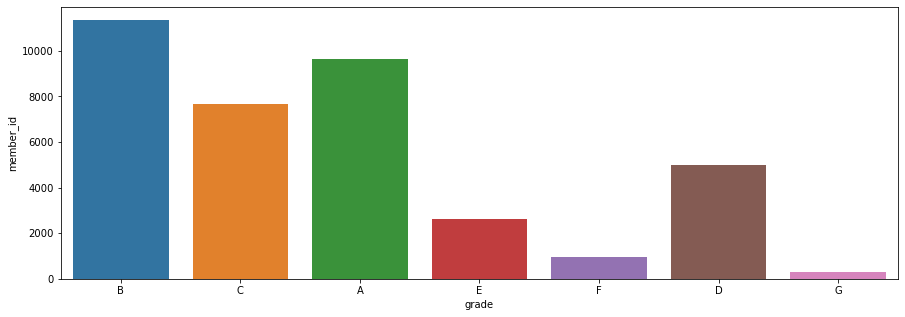

In [321]:
#plotting the barplot for grade vs member id to see no of application in all grades
plt.figure(figsize=(15, 5))
sns.barplot(data=df1,x='grade', y='member_id',estimator=len)
plt.show()

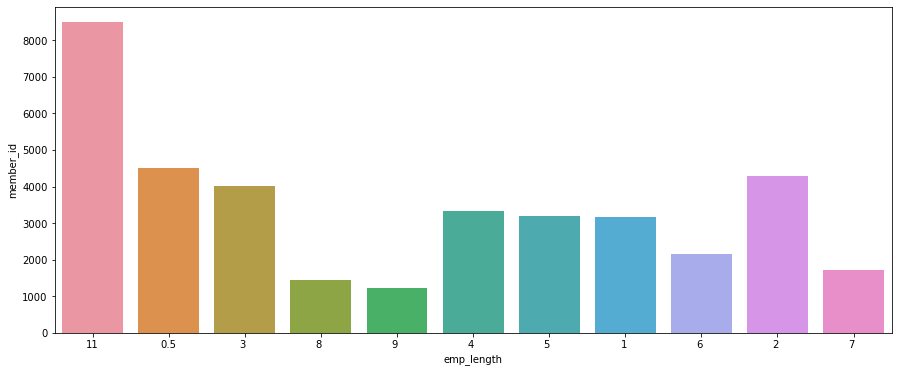

In [322]:
plt.figure(figsize=(15, 6))
sns.barplot(data=df1,x='emp_length', y='member_id',estimator=len)
plt.show()

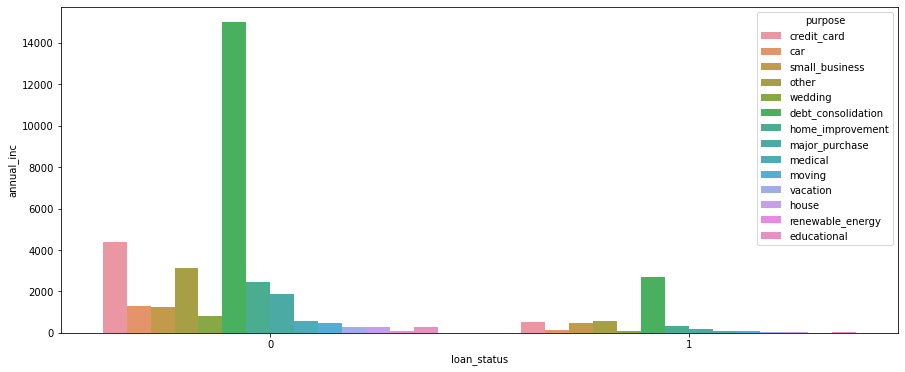

In [323]:
#plotting loan status v/s annual income
#we can see for debt consolidation most of the loan applications are applied
plt.figure(figsize=(15, 6))
sns.barplot(data=df1,x='loan_status', y='annual_inc',estimator=len, hue='purpose')
plt.show()

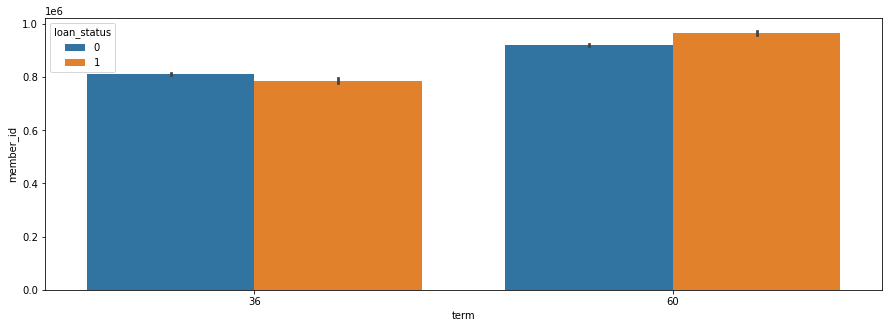

In [324]:
#plotting term v/s member ID
plt.figure(figsize=(15, 5))
sns.barplot(data=df1,x='term', y='member_id', hue='loan_status')
plt.show()

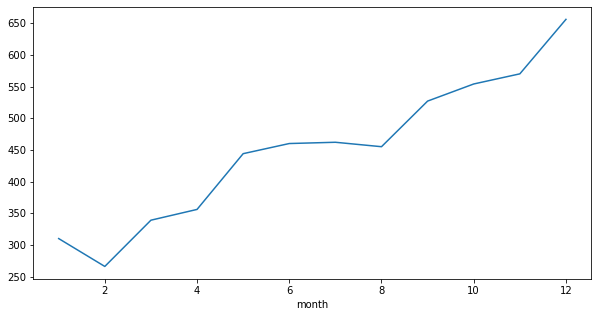

In [326]:
## Plot a line graph with group by as month. Loan application in later months is defaulted more
plt.figure(figsize=[10,5])
df1.groupby(['month'])['loan_status'].sum().plot()
plt.show()

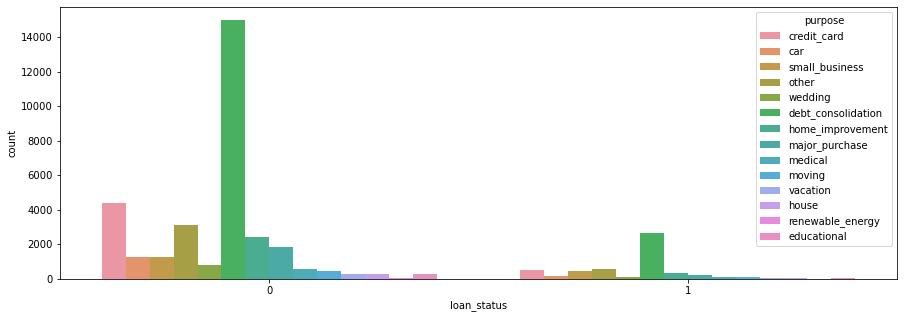

In [327]:
plt.figure(figsize=(15, 5))
sns.countplot(x='loan_status',hue='purpose',data=df1)
plt.show()

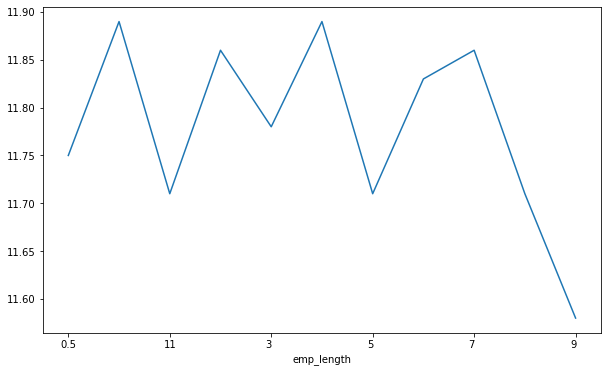

In [328]:
#plotting median of interest rate grouped by emp_length
plt.figure(figsize=[10,6])
df1.groupby(['emp_length'])['int_rate'].median().plot()
plt.show()

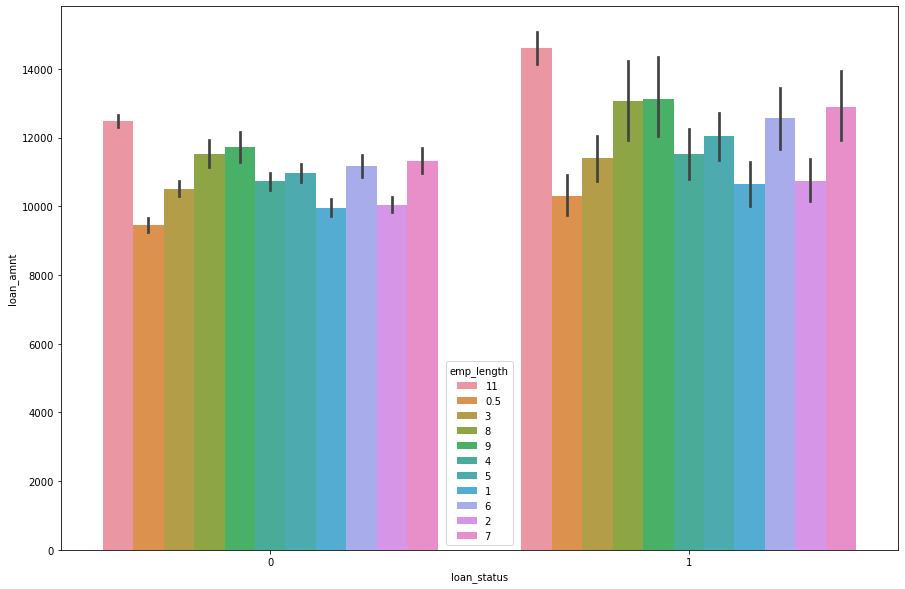

In [329]:
#plotting loan status vs loan amount and checking which employement length as hue
plt.figure(figsize=(15,10))
sns.barplot(x='loan_status',y='loan_amnt',hue='emp_length',data=df1)
plt.show()

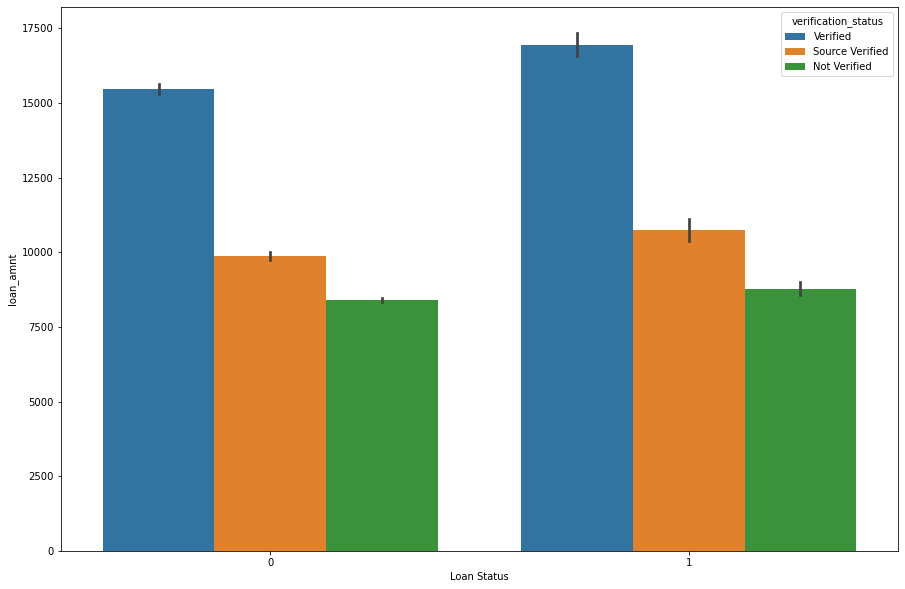

In [330]:
plt.figure(figsize=(15,10))
sns.barplot(x='loan_status',y='loan_amnt', hue='verification_status', data=df1)
plt.xlabel("Loan Status")
plt.show()

In [331]:
# binning loan amount for segmented analysis
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
df1['loan_amnt'] = df1['loan_amnt'].apply(lambda x: loan_amount(x))

In [332]:
#Create a pivot table for loan_amount and emp length with values set to loan status
df1.head()
res= pd.pivot_table(data=df1, index="emp_length", columns="loan_amnt", values="loan_status",aggfunc=np.mean)

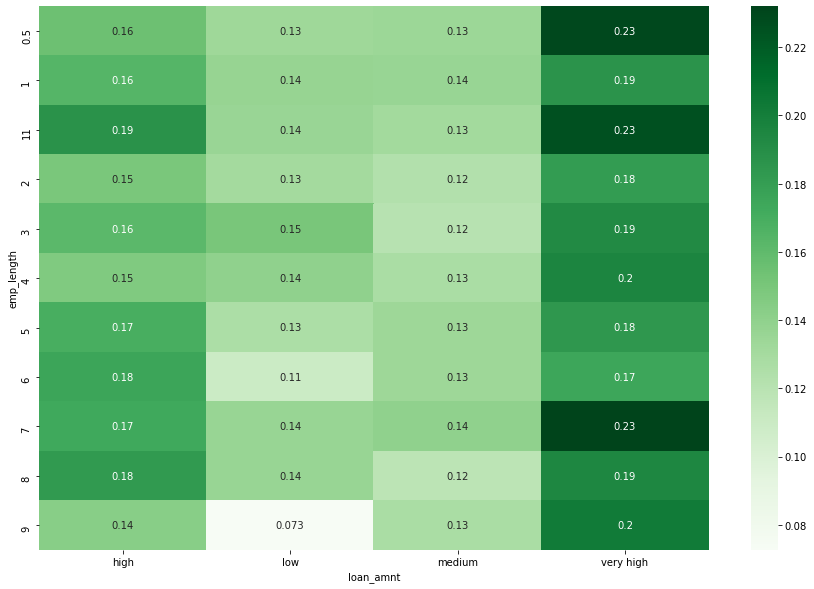

In [333]:
#Plot a heat map
#we can see the variation of lean status with respect to emp length and loan amount
plt.figure(figsize=(15,10))
sns.heatmap(res,cmap = "Greens", annot=True)
plt.show()

In [334]:
#Create a pivot table for purpose and loan amount with values set to loan status
df1.head()
res= pd.pivot_table(data=df1, index="purpose", columns="loan_amnt", values="loan_status",aggfunc=np.sum)

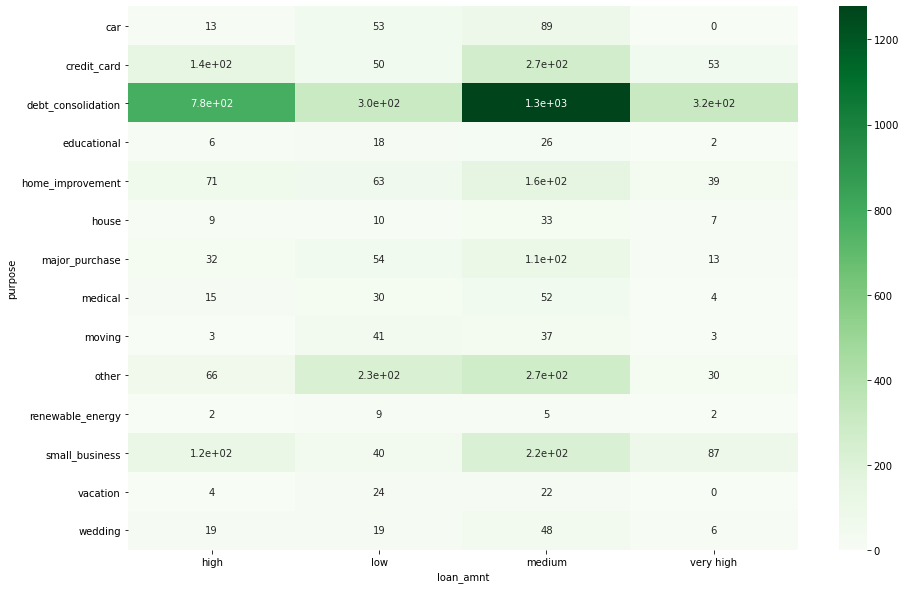

In [335]:
#Plot a heat map
#we can see the variation of lean status with respect to emp length and loan amount
plt.figure(figsize=(15,10))
sns.heatmap(res,cmap = "Greens", annot=True)
plt.show()

In [336]:
#finding the default percentage wrt purpose
default_purpose = (df1.groupby(['purpose'])['loan_status'].sum() / df1['purpose'].value_counts()) * 100
print(default_purpose)

car                   10.704420
credit_card           10.410288
debt_consolidation    15.157001
educational           16.403785
home_improvement      11.849192
house                 16.666667
major_purchase        10.144231
medical               15.396341
moving                15.217391
other                 16.051710
renewable_energy      19.148936
small_business        27.017544
vacation              14.367816
wedding               10.076670
dtype: float64


In [337]:
#finding the default percentage wrt purpose
default_state = (df1.groupby(['addr_state'])['loan_status'].sum() / df1['addr_state'].value_counts()) * 100
print(default_state)

AK    19.736842
AL    12.200957
AR    11.453744
AZ    14.143921
CA    15.868794
CO    12.231183
CT    12.588402
DC     7.109005
DE    10.909091
FL    17.891611
GA    15.845337
HI    17.283951
IA     0.000000
ID    16.666667
IL    13.453537
IN     0.000000
KS    10.655738
KY    14.657980
LA    12.470024
MA    11.829653
MD    15.721393
ME     0.000000
MI    14.456036
MN    13.550600
MO    16.383308
MS    10.526316
MT    12.987013
NC    15.151515
NE    60.000000
NH    14.649682
NJ    15.610860
NM    16.201117
NV    21.767241
NY    13.225896
OH    12.739965
OK    14.184397
OR    16.389549
PA    11.830202
RI    13.020833
SC    14.190687
SD    18.032787
TN    11.764706
TX    11.861804
UT    15.789474
VA    12.910448
VT    11.320755
WA    15.070243
WI    13.849765
WV    12.804878
WY     3.947368
dtype: float64
